In [179]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [181]:
%matplotlib inline

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.ndimage.filters import gaussian_filter
import statsmodels.api as sm
sns.set_palette(sns.color_palette('hot'))
sns.set_style('darkgrid')
sns.set_context('paper')

In [327]:
hour = 10

In [328]:
p_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/pickled/'
l_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/light_filt/'
long_loc = '/Users/TRD/Research_Personal/Quant_Mo/data/deep_look/'
file = p_loc+str(hour)+'all_data.pkl'
light_f = l_loc+str(hour)+'aw_light.npy'
# file = long_loc+str(hour)+'long_data.pkl'

In [337]:
print(file)
dp = pd.read_pickle(file)
light = gaussian_filter(np.load(light_f).astype('int'), sigma=7)
motion = dp.raw_motion.values
print(motion.shape)

/Users/TRD/Research_Personal/Quant_Mo/data/pickled/10all_data.pkl
(784,)


In [330]:
dp = dp[(np.abs(stats.zscore(dp)) < 2.8).all(axis=1)]
# dp = dp[ ((dp.raw_motion - dp.raw_motion.mean()) / dp.raw_motion.std()).abs() < 2.5 ]
# dp = dp[ ((dp.light - dp.light.mean()) / dp.raw_motion.std()).abs() < 2 ]
print(dp.shape)

(731, 7)


In [331]:
# Casts motion to int for the regression
def to_int(dp, column):
    if dp[column].dtype == 'float16':
        dp[column] = dp[column]*1e5
        dp[column] = dp[column].astype(np.int64)
    return dp[column]

In [332]:
tot_mox = np.abs(dp.motion_dx).sum()
tot_moy = np.abs(dp.motion_dy).sum()

p_x = 100*(tot_mox / (tot_mox+tot_moy)); p_y = 100*(tot_moy/ (tot_mox+tot_moy))
print("Percent X motion: {}\nPercent Y motion: {}".format(p_x, p_y))

Percent X motion: 52.9296875
Percent Y motion: 47.0947265625


                            OLS Regression Results                            
Dep. Variable:             raw_motion   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     394.9
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           1.46e-70
Time:                        12:39:21   Log-Likelihood:                -3879.5
No. Observations:                 731   AIC:                             7763.
Df Residuals:                     729   BIC:                             7772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -109.1110     14.859     -7.343      0.0

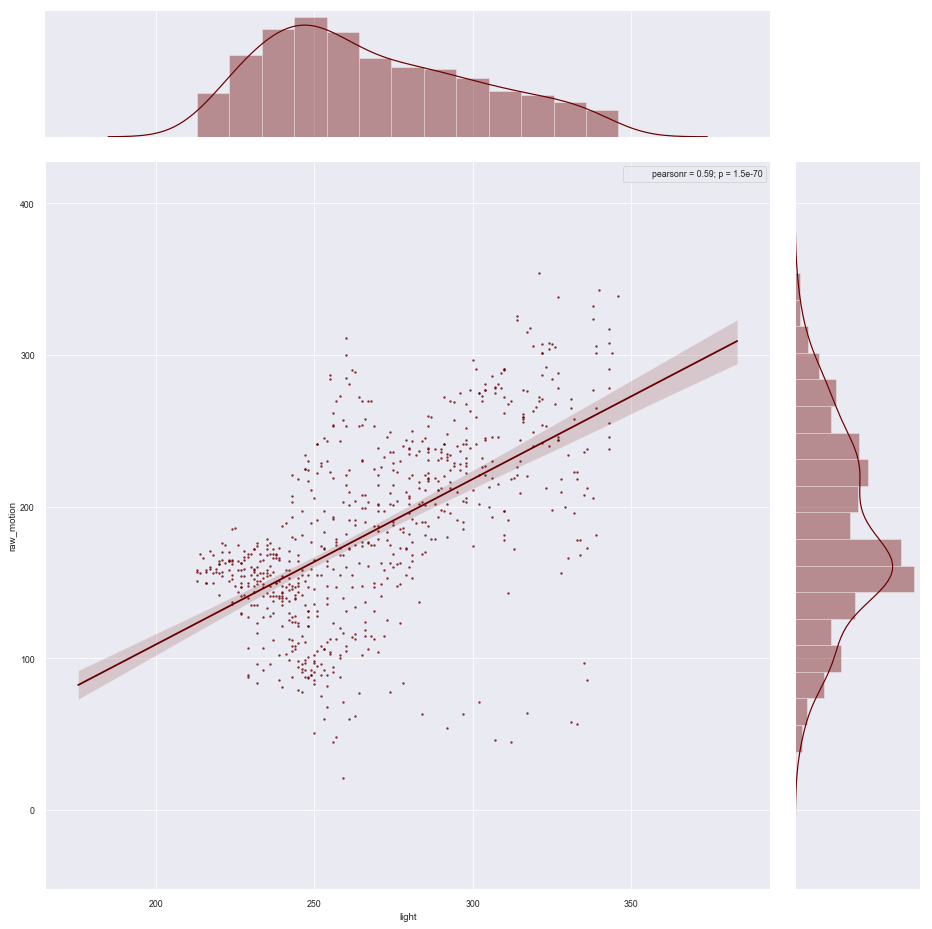

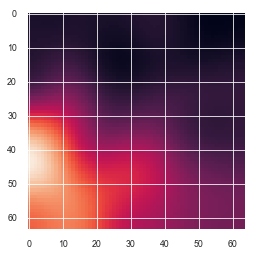

In [333]:
# This is a stats summary
dp['raw_motion'] = to_int(dp, 'raw_motion')
dp['motion_dx'] = to_int(dp, 'motion_dx')
dp['motion_dy'] = to_int(dp, 'motion_dy')

x_term = 'light'
y_term = 'raw_motion'
X = dp[[x_term]]
X = sm.add_constant(X)
Y = dp[y_term]
results = sm.OLS(Y, X).fit()
print(results.summary())

# This is the first regression curve
sns.jointplot(x_term,y_term, data=dp, marker = '.', kind='reg', size=13, stat_func=stats.pearsonr)
#dp['raw_motion'] = (dp['raw_motion'].values * 1e4).astype('int')
# sns.lmplot('light', 'raw_motion', data=dp, fit_reg = True, order=2, scatter=True, size=13)
plt.axis('on')
plt.show()

#This is the black and white image we're interested in
plt.imshow(light.astype(int))
plt.axis('on')
plt.show()

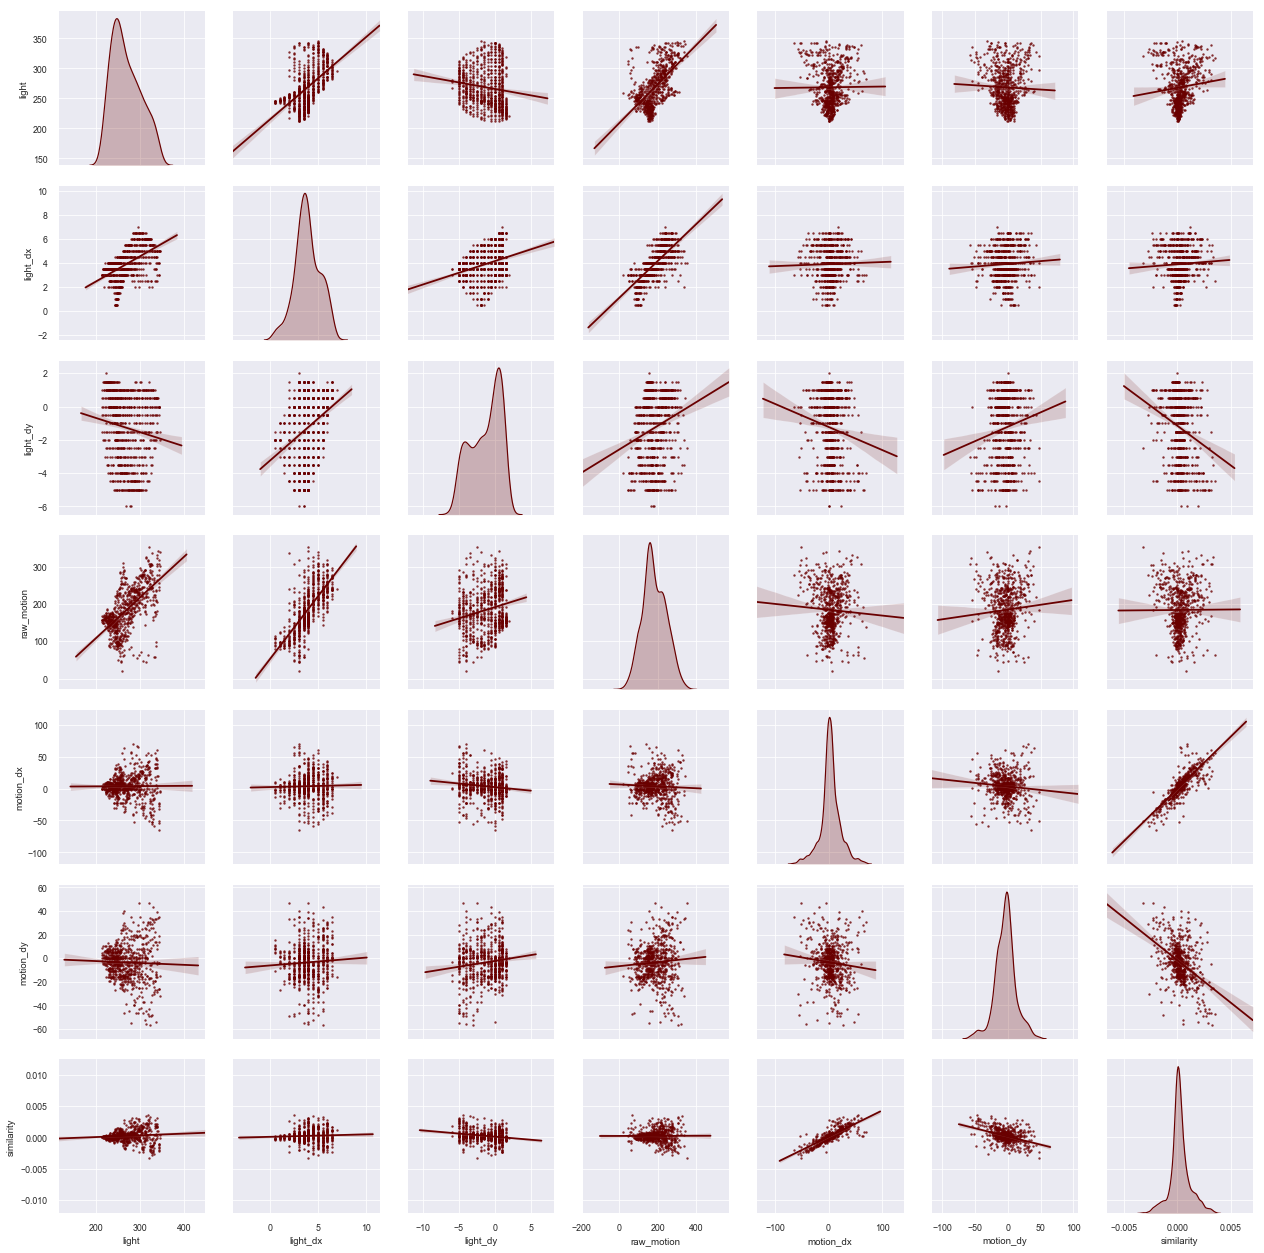

In [334]:
sns.pairplot(dp, diag_kind='kde', markers=".", kind='reg')

In [326]:
#import pandas_profiling
#pandas_profiling.ProfileReport(dp)

               light  light_dx  light_dy  raw_motion  motion_dx  motion_dy  \
light       1.000000  0.045303 -0.703058    0.272920  -0.036895   0.230527   
light_dx    0.045303  1.000000  0.060322    0.443041   0.027253   0.031703   
light_dy   -0.703058  0.060322  1.000000   -0.158300   0.007772  -0.143170   
raw_motion  0.272920  0.443041 -0.158300    1.000000   0.044623   0.079715   
motion_dx  -0.036895  0.027253  0.007772    0.044623   1.000000  -0.014123   
motion_dy   0.230527  0.031703 -0.143170    0.079715  -0.014123   1.000000   
similarity  0.240201 -0.059584 -0.139619   -0.095641   0.383697   0.442125   

            similarity  
light         0.240201  
light_dx     -0.059584  
light_dy     -0.139619  
raw_motion   -0.095641  
motion_dx     0.383697  
motion_dy     0.442125  
similarity    1.000000  


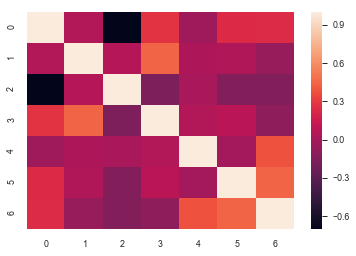

In [294]:
print(dp.corr())
sns.heatmap(dp.corr().values)

In [ ]:
light_arr = np.reshape(dp['light'].values, (64,64))
sns.heatmap(light_arr)

In [ ]:
import math
math.pow(784,0.5)